# Random Forest Classifier

# 1. Data Pre-processing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv("diabetes.csv")
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Data Cleaning 
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Data Describe
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


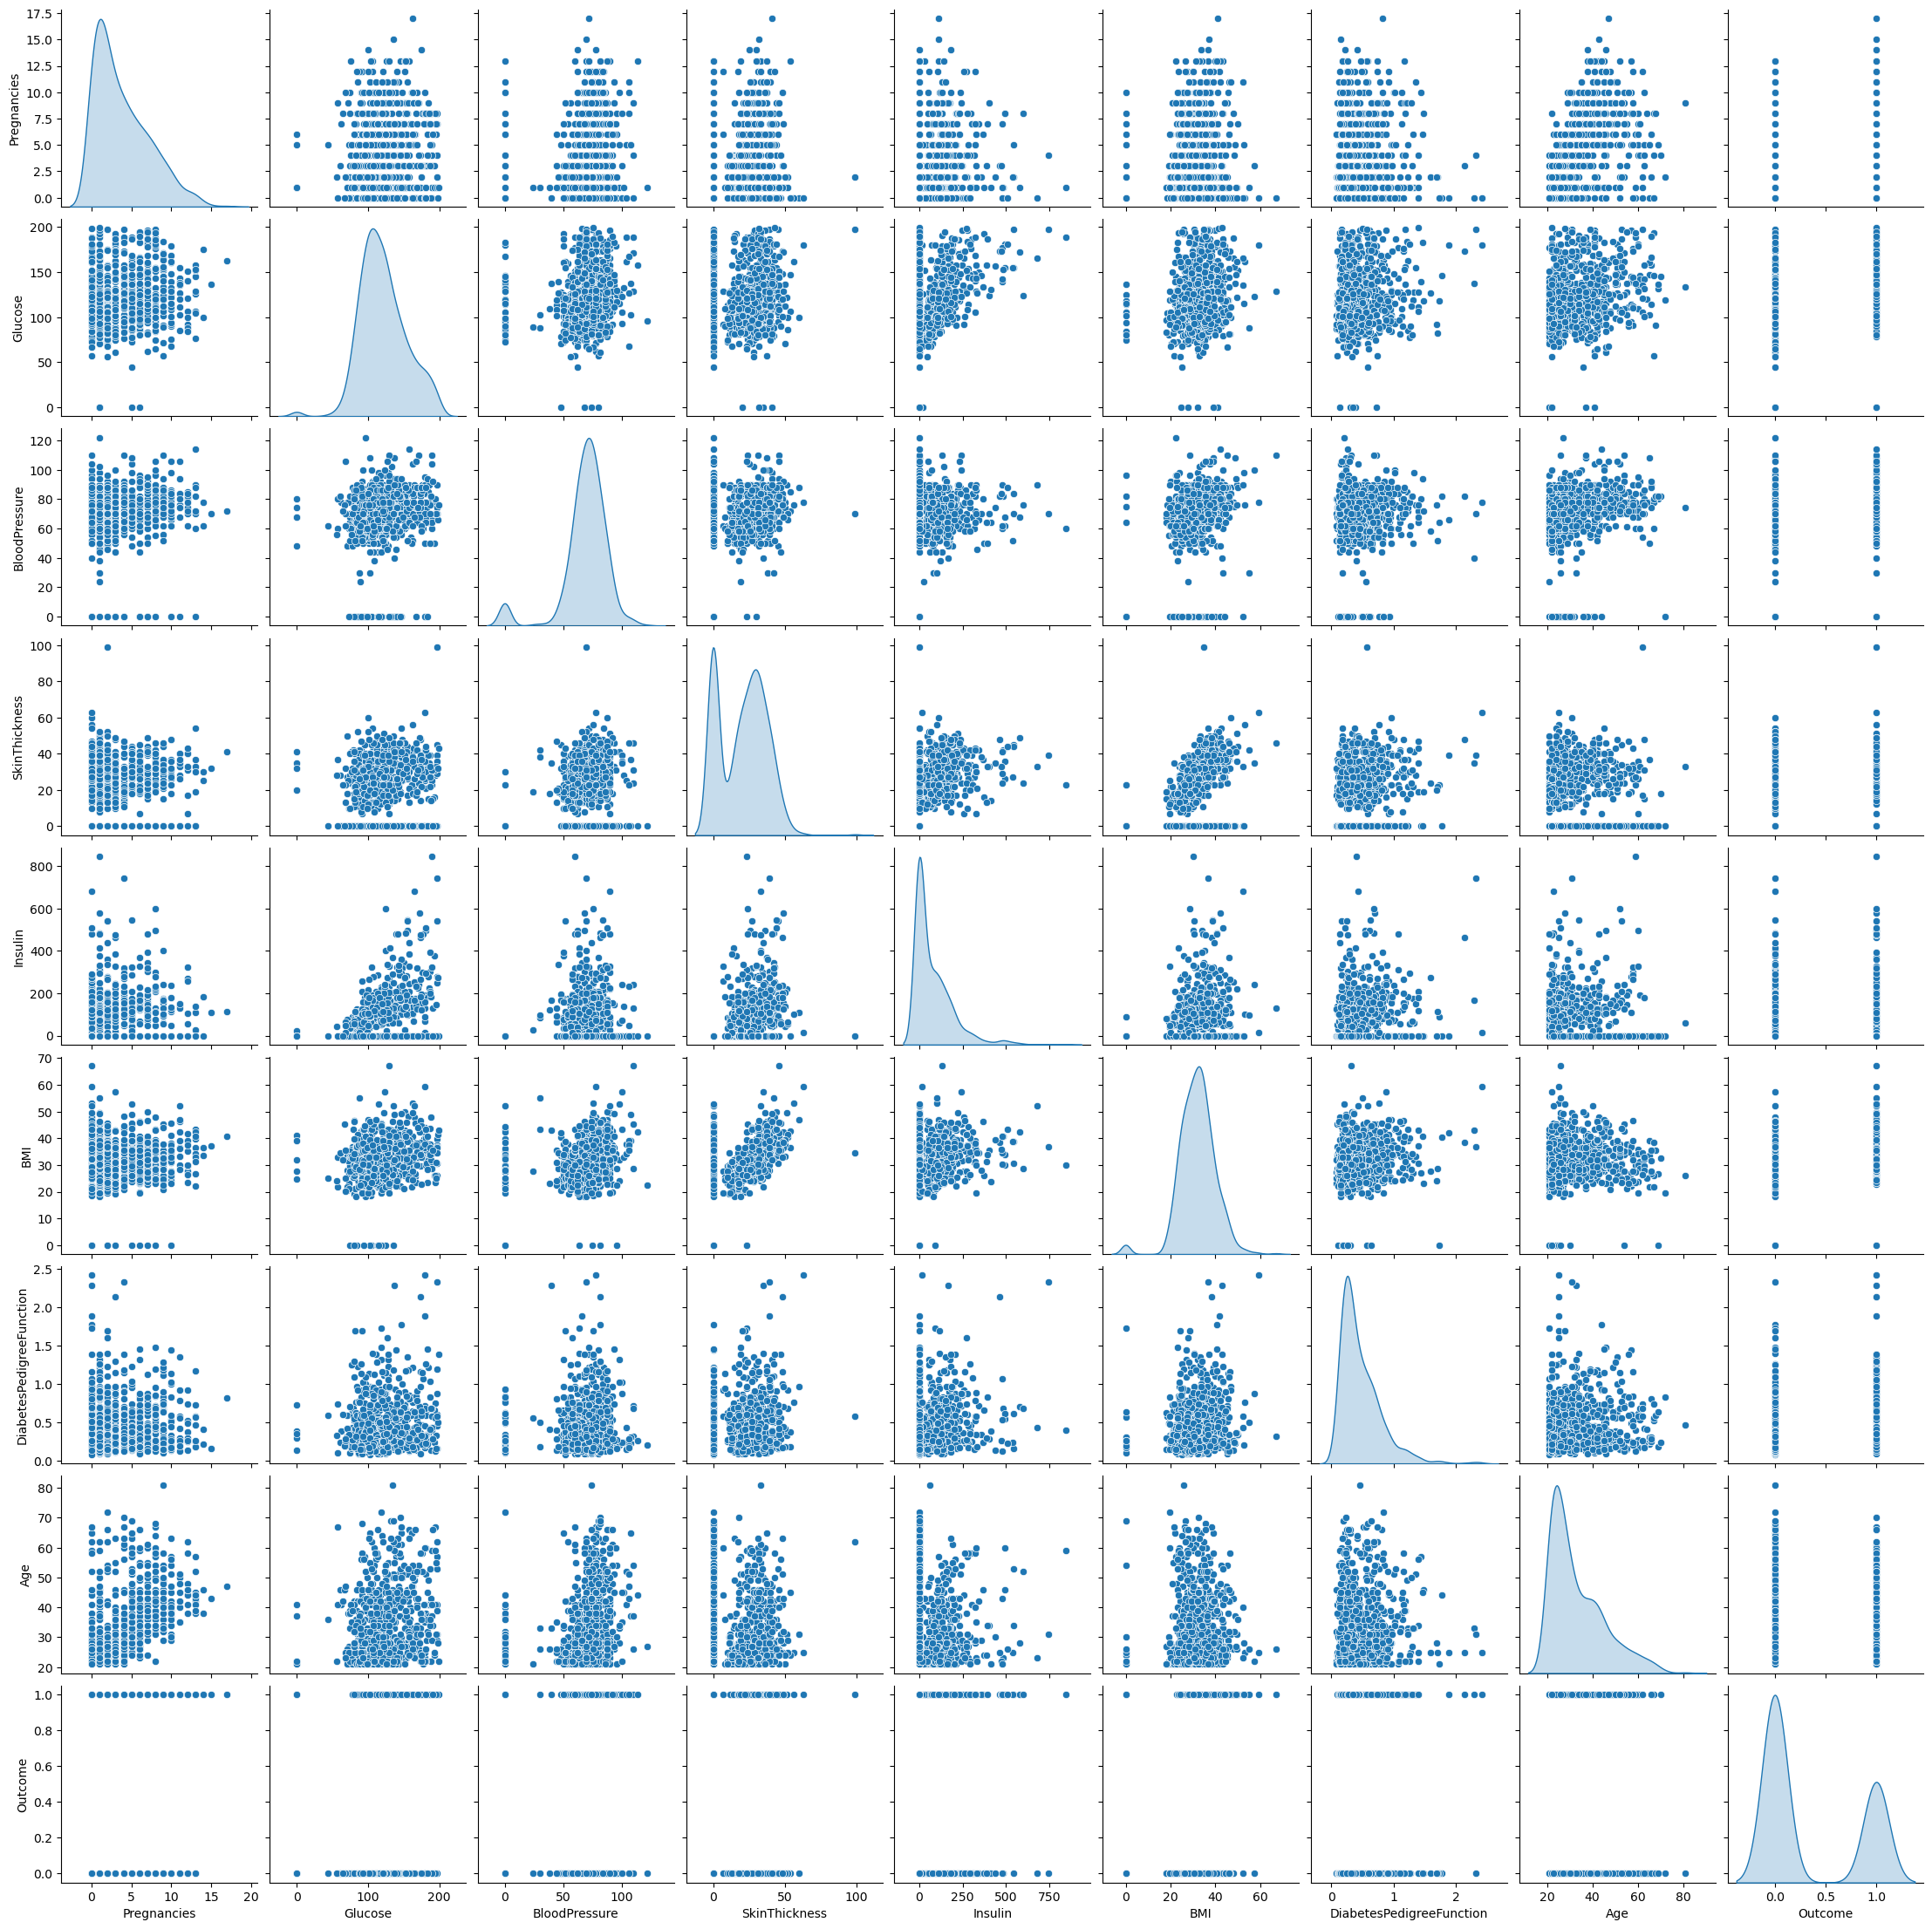

In [5]:
# Visualize the distributions of features
sns.pairplot(dataset, diag_kind="kde")
plt.show()

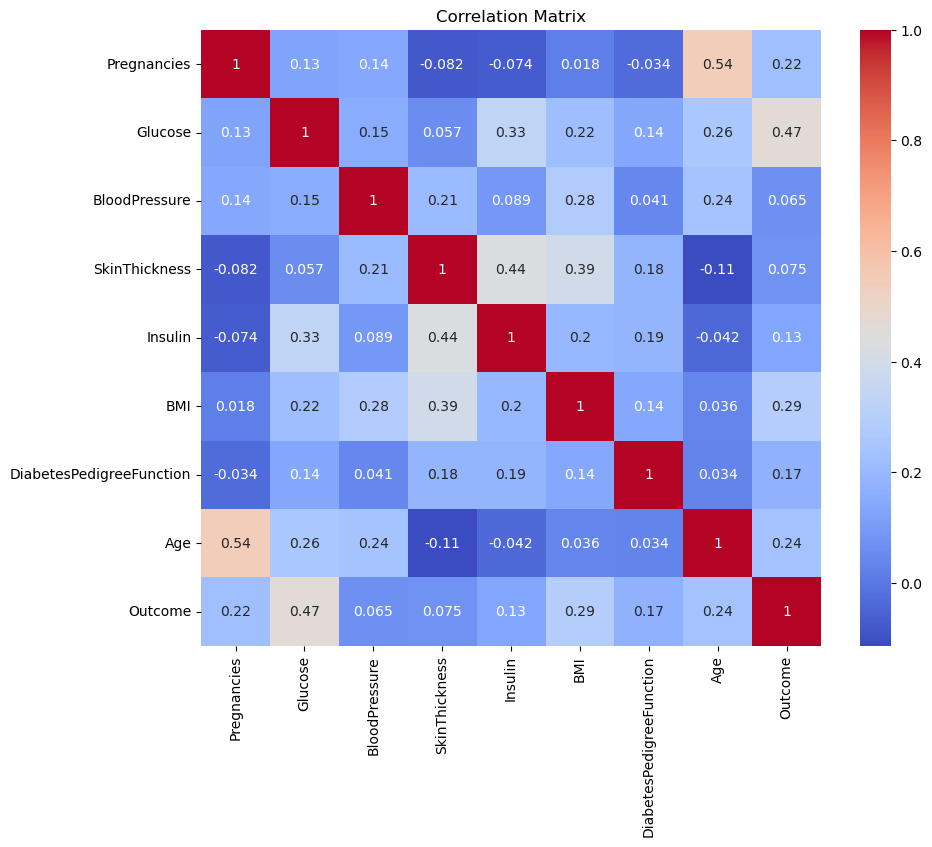

In [6]:
# Creating a correlation matrix to see the correlation between different features and the target variable
corr_matrix = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 2. Implementing Random Forest Classifier

In [9]:
# Training the Random Forest Classifier model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [10]:
# Predicting a new result
y_pred = classifier.predict(X_test)

# 3. Model Evaluation and Comparison

Confusion Matrix:


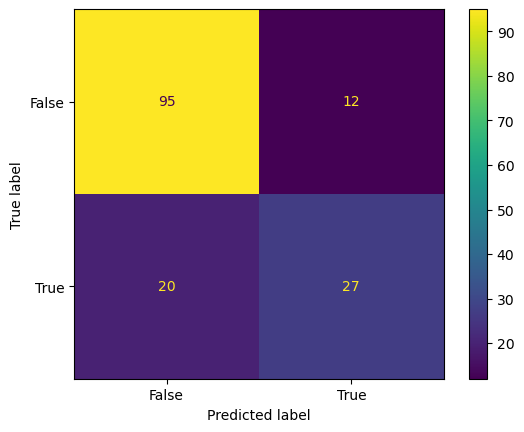

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
cm_plot.plot()
plt.show()

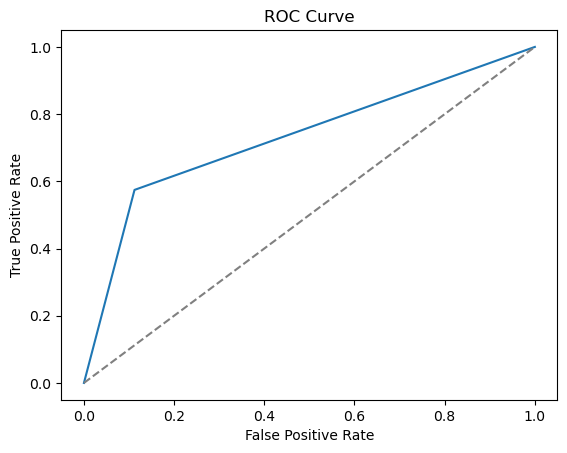

In [12]:
# Compute ROC curve and plot it 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [13]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Accuracy
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy:  {ac:.2f}")
# Precision
pr = precision_score(y_test, y_pred)
print(f"Precision: {pr:.2f}")
# Recall 
re = recall_score(y_test, y_pred)
print(f"Recall:    {re:.2f}")
# F1-Score
f = f1_score(y_test, y_pred)
print(f"F1-score:  {f:.2f}")
# AUC-ROC
ra = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC:   {ra:.2f}")

Accuracy:  0.79
Precision: 0.69
Recall:    0.57
F1-score:  0.63
AUC-ROC:   0.73


In [14]:
# Compute mean and standard deviation of cross-validation scores
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation 
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
print('Linear kernel:')
print('Mean accuracy:', cv_scores.mean())
print('Standard deviation:', cv_scores.std())

Linear kernel:
Mean accuracy: 0.7263228042116486
Standard deviation: 0.049855180205684864
